<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/%D0%94%D0%97.1/BarbashinAndreyTFe-01(%40QwertyAlexx)%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B01.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1
Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара: P0 = 5, 10, 15, 20 MPa. Для каждого значения взять следующие значения температуры t0 = 300, 350, 400, 450, 500 градусов Цельсия, Pk = 5 kPa. Принять давление за последней ступенью паровой турбины P2 = Pk. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ответ на задачу 1.1: [0.40752793685828786, 0.41534857277735654, 0.42331383701038755, 0.4313716841557481, 0.4394789062814819]
Ответ на задачу 1.1: [0.4319914433102389, 0.4395153404081028, 0.4471174940788134, 0.4547675937120188, 0.4624373413280606]
Ответ на задачу 1.1: [0.444936543898342, 0.4525381294846008, 0.46011857782201393, 0.46767985112152727, 0.47521394348785173]
Ответ на задачу 1.1: [0.4531137452524837, 0.46098081126904183, 0.4686965747060768, 0.4763082165381326, 0.48383431369269075]


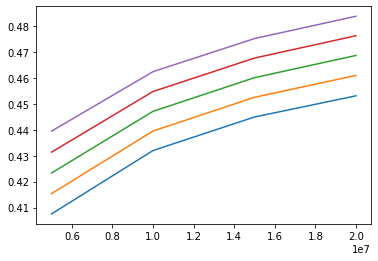

In [30]:
!pip install iapws
import matplotlib.pyplot as plt
import numpy as np
import iapws
from iapws import IAPWS97 as gas
from typing import Optional, Tuple, List, Union

point_type = iapws.iapws97.IAPWS97
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

def check_is_valid_numerical(values: List[Union[None, float]]) -> None:

    for value in values:
        if value:
            if not isinstance(value, (int, float)):
                raise ValueError(f"Argument should be int or float value! Given {type(value)}")


def construct_cycle_points(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None, 
) -> Tuple[point_type, point_type, point_type]:

    check_is_valid_numerical([p_0, p_k, t_0, x_0])
    if not t_0 and not x_0:
        raise ValueError("Neither t_0 not x_0 is not provided for start expansion point!")
    if not (p_0 and p_k):
        raise ValueError("P_0 and p_k must be specified!")
    if x_0 and (x_0 > 1 or x_0 < 0):
        raise ValueError("x_0 should be between 0 and 1")
        
    if t_0:
        point_0 = gas(P=p_0, T=t_0)
    else:
        point_0 = gas(P=p_0, x=x_0)
    
    p_condenser = gas(P=p_k, s=point_0.s)
    p_pump = gas(P=p_k, x=0)
    
    return point_0, p_condenser, p_pump


def compute_cycle_efficiency(p_0: point_type, p_condenser: point_type, p_pump: point_type) -> float:
 
    useful_energy = p_0.h - p_condenser.h
    full_energy = p_0.h - p_pump.h
    efficiency = useful_energy / full_energy
    return efficiency


def solve_exercise(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None,) -> float:
  
    point_0, p_condenser, p_pump = construct_cycle_points(
        p_0=p_0 * unit,
        p_k=p_k * unit,
        t_0=to_kelvin(t_0),
        x_0=x_0
    )

    efficiency = compute_cycle_efficiency(p_0=point_0, p_condenser=p_condenser, p_pump=p_pump)
    
    return efficiency
# Начальные параметры:
p_k = [5 * kPa,5 * kPa,5 * kPa,5 * kPa,5 * kPa]
p_0 = [5  * MPa,5  * MPa,5  * MPa,5  * MPa, 5 * MPa]
p_1 = [10 * MPa,10 * MPa,10 * MPa,10 * MPa, 10 * MPa]
p_2 = [15 * MPa,15 * MPa,15 * MPa,15 * MPa, 15 * MPa]
p_3 = [20 * MPa,20 * MPa,20 * MPa,20 * MPa, 20 * MPa]
t_0 = [to_kelvin(300),to_kelvin(350),to_kelvin(400),to_kelvin(450),to_kelvin(500)]

efficiency5Mpa = list(map(solve_exercise, p_0 ,p_k , t_0))
efficiency10Mpa = list(map(solve_exercise, p_1 ,p_k , t_0))
efficiency15Mpa = list(map(solve_exercise, p_2 ,p_k , t_0))
efficiency20Mpa = list(map(solve_exercise, p_3 ,p_k , t_0))

print("Ответ на задачу 1.1:", efficiency5Mpa)
print("Ответ на задачу 1.1:", efficiency10Mpa)
print("Ответ на задачу 1.1:", efficiency15Mpa)
print("Ответ на задачу 1.1:", efficiency20Mpa)
X = np.array([p_0, p_1,p_2, p_3])
Y = np.array([efficiency5Mpa, efficiency10Mpa, efficiency15Mpa, efficiency20Mpa])

plt.plot(X,Y)

plt.show()